<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

C:\Users\alber\AppData\Local\Temp\ipykernel_3344\3799027139.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(data['price'].median(), inplace=True)
C:\Users\alber\AppData\Local\Temp\ipykernel_3344\3799027139.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

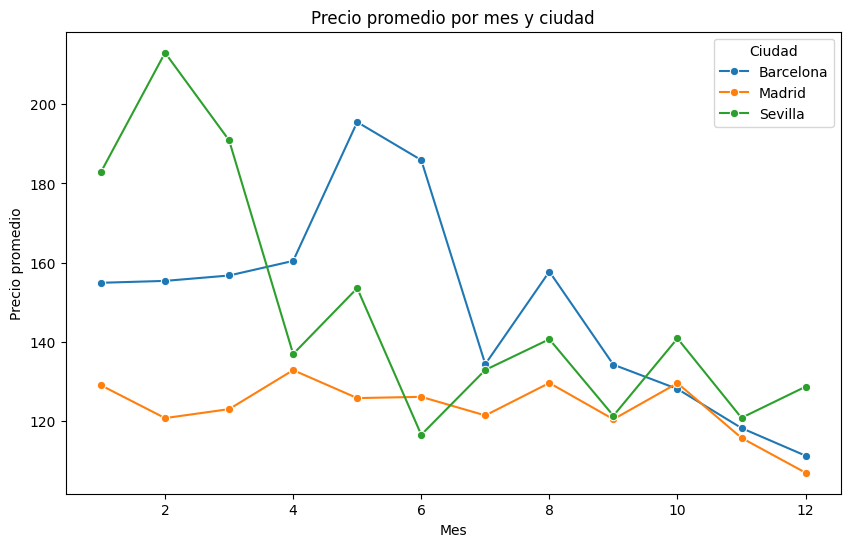

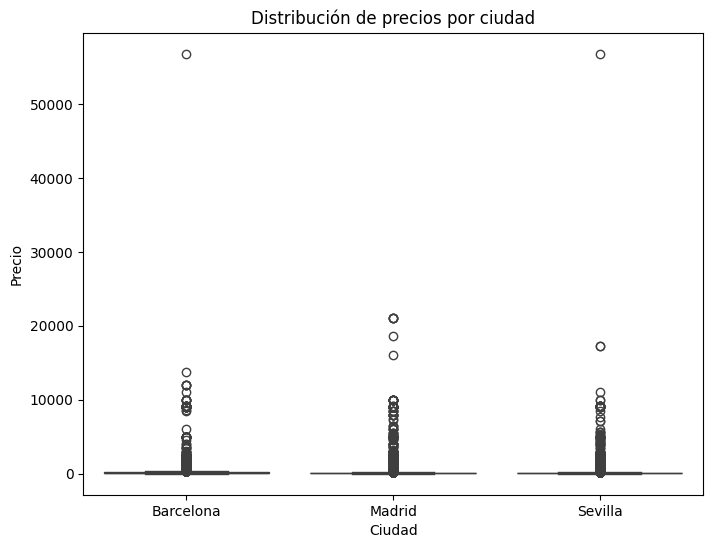

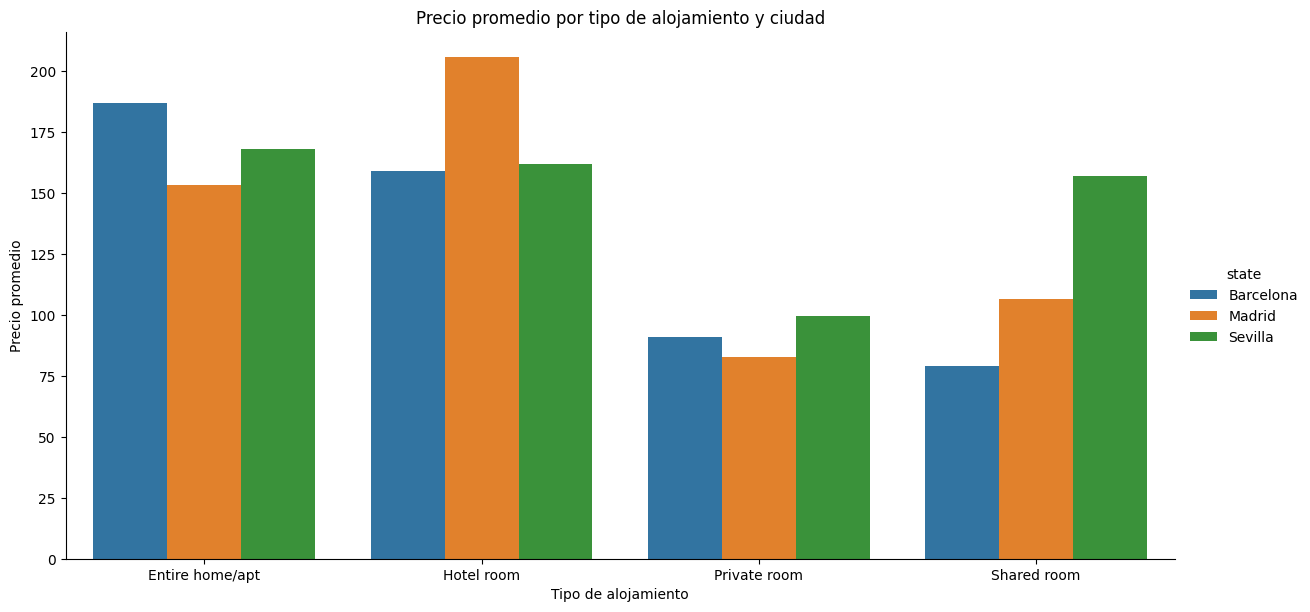

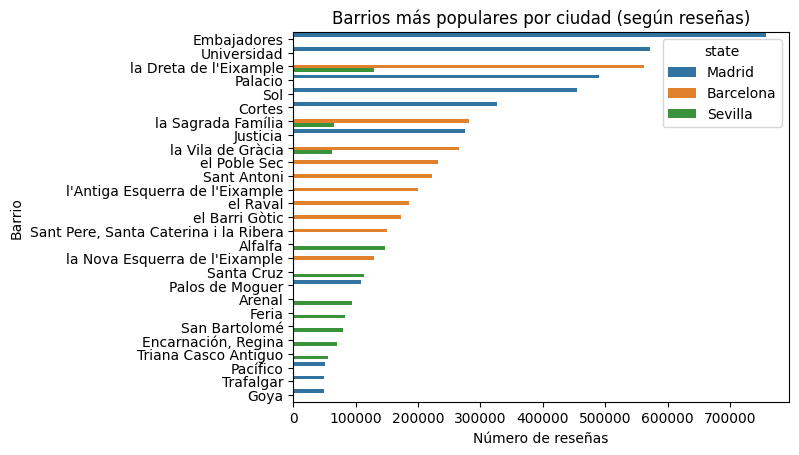

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
file_path = r'C:\Users\alber\OneDrive\Documentos\GitHub\DS_ONLINE_THEBRIDGE_ATC\Project_Break_EDA\DataSetConjunto'
data = pd.read_csv(file_path)

# =============================
# 1. Exploración inicial
# =============================
# Verificar las primeras filas
data.head()

# Resumen de columnas y tipos de datos
data.info()

# Descripción estadística general
data.describe()

# =============================
# 2. Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
# Suponiendo que los nulos en "price" o "reviews_per_month" necesitan ser tratados
data['price'].fillna(data['price'].median(), inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

# Eliminar columnas innecesarias (si aplica)
data.drop(columns=['license'], inplace=True, errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# 3. Análisis exploratorio por hipótesis
# =============================

# 3a. Estacionalidad de precios
# Promedio de precios por mes y ciudad
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# 3b. Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 3c. Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# 3d. Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()


# =============================
# 4. SQL: Consultas estructuradas
# =============================
# Consulta para estacionalidad:
# SELECT state, month, AVG(price) as avg_price
# FROM data
# GROUP BY state, month
# ORDER BY month;

# Comparación entre ciudades:
# SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
# FROM data
# GROUP BY state;

# Tipo de alojamiento:
# SELECT state, room_type, AVG(price) as avg_price
# FROM data
# GROUP BY state, room_type;

# Popularidad de barrios:
# SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
# FROM data
# GROUP BY state, neighbourhood
# ORDER BY total_reviews DESC
# LIMIT 10;


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Cargar los datos
file_path = 'ruta_a_tu_dataset.csv'
data = pd.read_csv(file_path)

# =============================
# 1. Exploración inicial
# =============================
# Verificar las primeras filas
data.head()

# Resumen de columnas y tipos de datos
data.info()

# Descripción estadística general
data.describe()

# =============================
# 2. Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
data['price'].fillna(data['price'].median(), inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

# Eliminar columnas innecesarias (si aplica)
data.drop(columns=['license'], inplace=True, errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# 3. Análisis exploratorio por hipótesis
# =============================

# 3a. Estacionalidad de precios
# Promedio de precios por mes y ciudad
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# 3b. Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 3c. Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# 3d. Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()

# =============================
# 4. Profundización en el análisis
# =============================

# 4a. Distribución porcentual de tipos de alojamiento
room_type_distribution = data.groupby(['state', 'room_type']).size().reset_index(name='count')
room_type_distribution['percentage'] = room_type_distribution.groupby('state')['count'].transform(lambda x: x / x.sum() * 100)
sns.barplot(data=room_type_distribution, x='state', y='percentage', hue='room_type')
plt.title('Distribución porcentual de tipos de alojamiento por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')
plt.show()

# 4b. Relación entre disponibilidad y precio
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='availability_365', y='price', hue='state', alpha=0.5)
plt.title('Relación entre disponibilidad y precio por ciudad')
plt.xlabel('Días disponibles al año')
plt.ylabel('Precio')
plt.legend(title='Ciudad')
plt.show()

# 4c. Hosts más activos
top_hosts = data.groupby('host_id').agg(total_listings=('id', 'count'), avg_price=('price', 'mean')).reset_index()
top_hosts = top_hosts.sort_values(by='total_listings', ascending=False).head(10)
print("Top 10 Hosts más activos:\n", top_hosts)

# 4d. Reseñas por mes
reviews_by_month = data.groupby(['state', 'month'])['number_of_reviews'].sum().reset_index()
sns.lineplot(data=reviews_by_month, x='month', y='number_of_reviews', hue='state', marker='o')
plt.title('Cantidad de reseñas por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Número de reseñas')
plt.legend(title='Ciudad')
plt.show()

# 4e. Geolocalización de alojamientos
barcelona_data = data[data['state'] == 'Barcelona']
map_barcelona = folium.Map(location=[barcelona_data['latitude'].mean(), barcelona_data['longitude'].mean()], zoom_start=12)
for _, row in barcelona_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(map_barcelona)
map_barcelona.save('map_barcelona.html')

# 4f. Outliers en precios
sns.boxplot(data=data, x='state', y='price')
plt.title('Outliers de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# 4g. Comparación por temporadas
high_season_months = [6, 7, 8, 12]
data['season'] = data['month'].apply(lambda x: 'Alta' if x in high_season_months else 'Baja')
season_prices = data.groupby(['state', 'season'])['price'].mean().reset_index()
sns.barplot(data=season_prices, x='state', y='price', hue='season')
plt.title('Precio promedio por temporada y ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio promedio')
plt.show()

# =============================
# 5. Consultas SQL para los análisis
# =============================
# Estacionalidad:
# SELECT state, month, AVG(price) as avg_price
# FROM data
# GROUP BY state, month
# ORDER BY month;

# Comparación entre ciudades:
# SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
# FROM data
# GROUP BY state;

# Tipo de alojamiento:
# SELECT state, room_type, AVG(price) as avg_price
# FROM data
# GROUP BY state, room_type;

# Popularidad de barrios:
# SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
# FROM data
# GROUP BY state, neighbourhood
# ORDER BY total_reviews DESC
# LIMIT 10;

# Hosts más activos:
# SELECT host_id, COUNT(id) as total_listings, AVG(price) as avg_price
# FROM data
# GROUP BY host_id
# ORDER BY total_listings DESC
# LIMIT 10;

# Temporadas:
# SELECT state, CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END as season, AVG(price) as avg_price
# FROM data
# GROUP BY state, season;


FileNotFoundError: [Errno 2] No such file or directory: 'ruta_a_tu_dataset.csv'

In [ ]:
# Profundización punto 8

# =============================
# 8. Comparación de precios por temporadas
# =============================

import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Crear una columna de temporada
high_season_months = [6, 7, 8, 12]
data['season'] = data['month'].apply(lambda x: 'Alta' if x in high_season_months else 'Baja')

# =============================
# 8.1. Distribución de precios por temporada
# =============================
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='season', y='price', palette='coolwarm')
plt.title('Distribución de precios por temporada (Alta vs Baja)')
plt.xlabel('Temporada')
plt.ylabel('Precio')
plt.show()

# Prueba estadística: t-test
high_season_prices = data[data['season'] == 'Alta']['price']
low_season_prices = data[data['season'] == 'Baja']['price']

# Comparación de medias
t_stat, p_value = ttest_ind(high_season_prices, low_season_prices, nan_policy='omit')
print(f"T-test entre temporadas: t-stat = {t_stat:.2f}, p-value = {p_value:.5f}")

# Comparación no paramétrica (Mann-Whitney U)
u_stat, p_value_u = mannwhitneyu(high_season_prices, low_season_prices, alternative='two-sided')
print(f"Prueba Mann-Whitney U: U-stat = {u_stat:.2f}, p-value = {p_value_u:.5f}")

# =============================
# 8.2. Comparación por tipo de alojamiento
# =============================
room_season_prices = data.groupby(['season', 'room_type'])['price'].mean().reset_index()

sns.catplot(data=room_season_prices, x='room_type', y='price', hue='season', kind='bar', height=6, aspect=2, palette='Set2')
plt.title('Precio promedio por tipo de alojamiento y temporada')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# =============================
# 8.3. Comparación por ciudad
# =============================
city_season_prices = data.groupby(['state', 'season'])['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=city_season_prices, x='state', y='price', hue='season', palette='Set1')
plt.title('Precio promedio por ciudad y temporada')
plt.xlabel('Ciudad')
plt.ylabel('Precio promedio')
plt.legend(title='Temporada')
plt.show()

# =============================
# 8.4. Evolución mensual dentro de cada temporada
# =============================
# Calcular promedio mensual por temporada y ciudad
monthly_prices = data.groupby(['state', 'month', 'season'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_prices, x='month', y='price', hue='state', style='season', markers=True, dashes=False)
plt.title('Evolución mensual de precios por temporada y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad y Temporada')
plt.show()

# =============================
# 8.5. Outliers en precios por temporada
# =============================
sns.boxplot(data=data, x='season', y='price', hue='state', palette='coolwarm')
plt.title('Outliers de precios por ciudad y temporada')
plt.xlabel('Temporada')
plt.ylabel('Precio')
plt.show()

# =============================
# 8.6. Insights clave (resumen textual)
# =============================
# Analizar si los precios en alta temporada son significativamente más altos.
if p_value < 0.05:
    print("Hay una diferencia estadísticamente significativa en los precios entre temporadas altas y bajas (T-test).")
else:
    print("No se encontraron diferencias significativas en los precios entre temporadas altas y bajas (T-test).")

if p_value_u < 0.05:
    print("La prueba no paramétrica también confirma diferencias significativas en los precios (Mann-Whitney U).")
else:
    print("La prueba no paramétrica no confirma diferencias significativas en los precios (Mann-Whitney U).")


In [ ]:
SELECT state, season, AVG(price) AS avg_price
FROM (
    SELECT *,
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
) AS temp
GROUP BY state, season;


In [ ]:
SELECT state, month, season, AVG(price) AS avg_price
FROM (
    SELECT *,
           CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
    FROM data
) AS temp
GROUP BY state, month, season
ORDER BY month, state;
